# Logistic Regression with Python 
will be working with the Titanic Data Set to predict a binary classification and whether a passenger will survive or die.

The data contians the following columns:

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Check the data

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()# null values in the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis



## Missing Data

Heatmap to see where we are missing data!

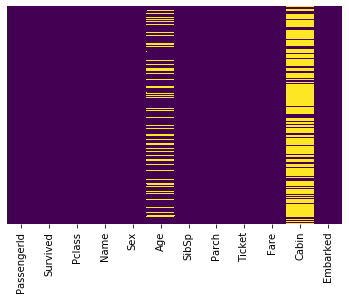

In [6]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')#most of the NaN in Cabin and Age columns.
#yellow lines refer to null values

In [7]:
train['Embarked'].isnull().value_counts()#two NaN values in Embarked column

False    889
True       2
Name: Embarked, dtype: int64

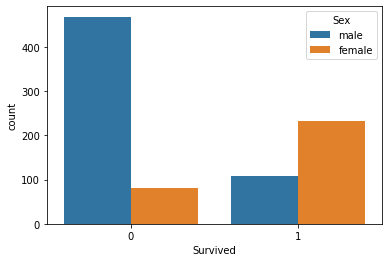

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex')

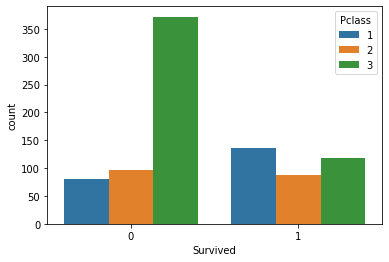

In [9]:
sns.countplot(x='Survived',data=train,hue='Pclass')

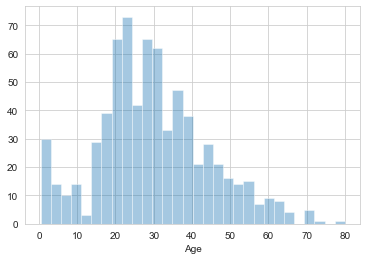

In [10]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

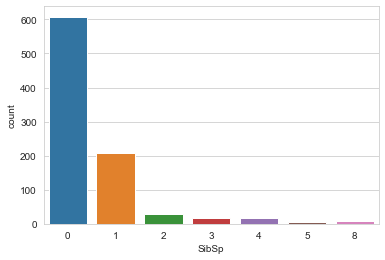

In [11]:
sns.countplot(train['SibSp'])

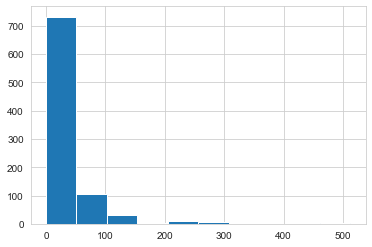

In [12]:
train['Fare'].hist()

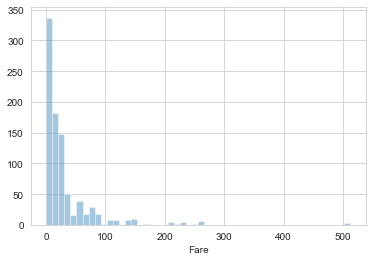

In [13]:
sns.distplot(train['Fare'],kde=False)

### Cufflinks for plots

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist')

In [17]:
#train[['Pclass','Age']].iloc[0][0]

In [18]:
#train[['Pclass','Age']].apply(lambda x:x+100,axis=1)
# axis =1 refers to row slicing (axis=0 for column) when apply function/lambda exp. each row/column is passed as a pandas serie
#to the function.

In [19]:
def onefunc(n):
    return 1,5

In [20]:
train[['Pclass','Age']].apply(onefunc,axis=1,result_type='broadcast')

,Pclass,Age
0,1.0,5.0
1,1.0,5.0
2,1.0,5.0
3,1.0,5.0
4,1.0,5.0
...,...,...
886,1.0,5.0
887,1.0,5.0
888,1.0,5.0
889,1.0,5.0


In [21]:
def of(n):
    return 1

In [22]:
train[['Pclass','Age']].apply(of,axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Length: 891, dtype: int64

## Data Cleaning

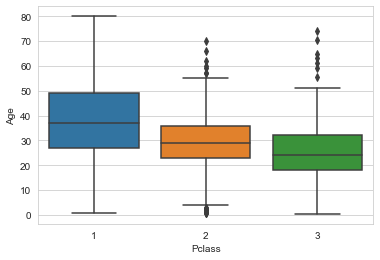

In [23]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [24]:
#train[train['Pclass']==1]['Age'].mean()# getting the age avg of the people in the class 1 (first class)

### This function is intended to fill all NaN values in Age column with the Average values of age based on Pclass

In [25]:
def impute_age (cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [26]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)#passing age and pclass colmns in form of multiple series(row by row) to 
# impute_age function. Note that the function returns only one value so changes are taken place in only one column/serie

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


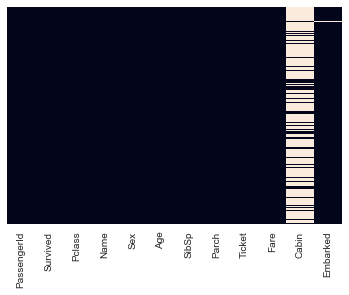

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)# age is filled.

In [29]:
train.drop('Cabin',inplace=True,axis=1)#dropping cabin column as most of it is empty

In [30]:
train.dropna(inplace=True)#dropping the NaN data in Embarked column

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables

In [31]:
train.head()
# first we get rid of name, ticket and passengerid features as it won't help us in prediction
#second we covert the categorical values in sex and embarked into dummy variables(0/1) based on its presence

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
sex=pd.get_dummies(train['Sex'],drop_first=True)#get the dummies

In [33]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [34]:
train.drop(['PassengerId','Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [35]:
train=pd.concat([train,sex,embarked],axis=1)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


## Building logistic model

In [37]:
from sklearn.model_selection import train_test_split

## Train Test Split

In [38]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training and Predicting

In [43]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel=LogisticRegression(max_iter=1000)

In [47]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions=logmodel.predict(X_test)

## Evaluation
We can check precision,recall,f1-score using classification report!

In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


In [57]:
(150+72)/(32+13+150+72)

0.8314606741573034